# HW 5
#### Umur Can Kaya - 090140107

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Question 1:
Power in electric circuit:
$$P = I^2 R$$
Assign some numbers to $I$ and $R$ and do the error propagation.

$I$ = ```I``` = 1

$-\alpha_I$ = ```dI_m``` = 0.01

$+\alpha_I$ = ```dI_p``` = 0.03

$R$ = ```I``` = 10

$-\alpha_R$ = ```dR_m``` = 0.2

$+\alpha_R$ = ```dR_p``` = 0.1

With these assigned values, above equation becomes:
$$P_{-\alpha_P}^{+\alpha_P} = \left( 1_{0.01}^{0.03} \right)^2 + 10_{0.1}^{0.2}$$

In order to calculate the error on $P$, I will use the functional approach:

In [32]:
def P(I,R):
    return I**2 * R

In [3]:
def statistical_error(f,x1,x2):
    x1_mean = x1[:,0]
    dx1_m = x1[:,1]
    dx1_p = x1[:,2]
    x2_mean = x2[:,0]
    dx2_m = x2[:,1]
    dx2_p = x2[:,2]
    
    df_m = np.sqrt((f(x1_mean-dx1_m,x2_mean)-f(x1_mean,x2_mean))**2 + (f(x1_mean,x2_mean-dx2_m)-f(x1_mean,x2_mean))**2)
    df_p = np.sqrt((f(x1_mean+dx1_p,x2_mean)-f(x1_mean,x2_mean))**2 + (f(x1_mean,x2_mean+dx2_p)-f(x1_mean,x2_mean))**2)
    return f(x1_mean,x2_mean), df_m, df_p

In [4]:
I = 1
dI_m = 0.01
dI_p = 0.03

R = 10
dR_m = 0.2
dR_p = 0.1

current = np.array([[I, dI_m, dI_p]])
resistance = np.array([[R, dR_m, dR_p]])

In [5]:
P, dP_m, dP_p = statistical_error(P,current,resistance)

In [6]:
print('P = %.2f\ndP_m = %.2f\ndP_p = %.2f\n'%(P, dP_m, dP_p))

P = 10.00
dP_m = 0.28
dP_p = 0.62



$$10_{0.28}^{0.62} = \left( 1_{0.01}^{0.03} \right)^2 + 10_{0.1}^{0.2}$$

By using the function ```statistical_error``` which is defined above, error propagation of a datasets can be also done:

In [62]:
np.random.seed(1)

time = np.linspace(0,1.25,125)

I = np.sin(time*10) * time
dI_m = np.random.random(time.shape)/10 + 0.05
dI_p = np.random.random(time.shape)/10 + 0.05

R = time**2
dR_m = abs((time-(np.random.random(time.shape)* time/10))**2 - R) + 0.05
dR_p = ((time+(np.random.random(time.shape)* time/10))**2 - R) + 0.05

df = pd.DataFrame()
df['time'] = time
df['I'] = I
df['-dI'] = dI_m
df['+dI'] = dI_p
df['R'] = R
df['-dR'] = dR_m
df['+dR'] = dR_p
df.head()

,time,I,-dI,+dI,R,-dR,+dR
0,0.000000,0.000000,0.091702,0.103883,0.000000,0.050000,0.050000
1,0.010081,0.001014,0.122032,0.105282,0.000102,0.050019,0.050018
2,0.020161,0.004037,0.050011,0.134203,0.000406,0.050030,0.050058
3,0.030242,0.009007,0.080233,0.062417,0.000915,0.050169,0.050131
4,0.040323,0.015822,0.064676,0.077918,0.001626,0.050191,0.050062


Suppose we are measuring the values of current and resistance of a sample and we obtain the data above.
We want to calculate the power dissipation on the sample and propagate the errors accordingly.

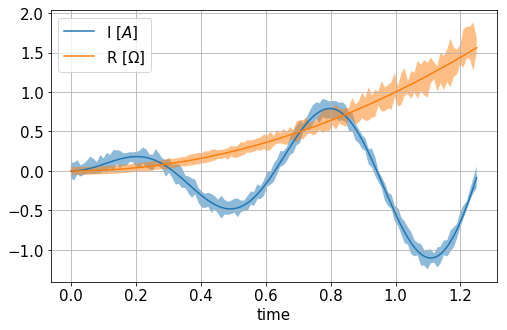

In [63]:
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=15)
fs = 15


fig, ax = plt.subplots(figsize=(8,5))

ax.plot(time, df['I'], label='I [$A$]');
ax.fill_between(time,df['I']+df['+dI'],df['I']-df['-dI'],alpha=0.5);

ax.plot(time, df['R'], label='R [$\Omega$]');
ax.fill_between(time,df['R']+df['+dR'],df['R']-df['-dR'],alpha=0.5);

ax.set_xlabel('time')
ax.grid(True)
ax.legend(loc='best', fontsize=fs);

$P$ and error on $P$ can calculated easily by using the function ```statistical_error```:

In [64]:
df['P'], df['-dP'], df['+dP'] = statistical_error(P,np.array([df['I'],df['-dI'],df['+dI']]).T,np.array([df['R'],df['-dR'],df['+dR']]).T)
df.head()

,time,I,-dI,+dI,R,-dR,+dR,P,-dP,+dP
0,0.000000,0.000000,0.091702,0.103883,0.000000,0.050000,0.050000,0.000000e+00,0.000000,0.000000
1,0.010081,0.001014,0.122032,0.105282,0.000102,0.050019,0.050018,1.045823e-10,0.000001,0.000001
2,0.020161,0.004037,0.050011,0.134203,0.000406,0.050030,0.050058,6.625484e-09,0.000001,0.000008
3,0.030242,0.009007,0.080233,0.062417,0.000915,0.050169,0.050131,7.419542e-08,0.000006,0.000006
4,0.040323,0.015822,0.064676,0.077918,0.001626,0.050191,0.050062,4.070273e-07,0.000013,0.000019


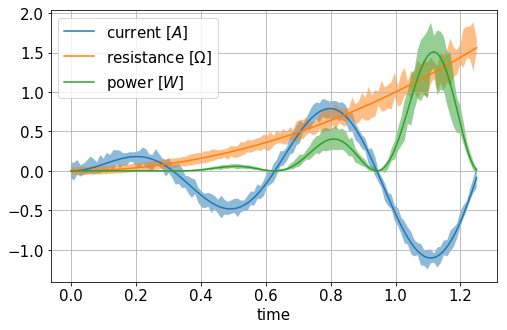

In [69]:
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=15)
fs = 15


fig, ax = plt.subplots(figsize=(8,5))

ax.plot(time, df['I'], label='current [$A$]')
ax.fill_between(time,df['I']+df['+dI'],df['I']-df['-dI'],alpha=0.5)

ax.plot(time, df['R'], label='resistance [$\Omega$]')
ax.fill_between(time,df['R']+df['+dR'],df['R']-df['-dR'],alpha=0.5)

ax.plot(time, df['P'], label='power [$W$]')
ax.fill_between(time,df['P']+df['+dP'],df['P']-df['-dP'],alpha=0.5)

ax.set_xlabel('time')
ax.grid(True)
ax.legend(loc='best', fontsize=fs);

### Question 2

In [44]:
np.random.seed(10101)
N = 100000
experiments = []
for i in range(4):
    experiments.append(np.random.normal(np.random.random()*10,np.random.random()+10,N))
experiments = np.array(experiments)

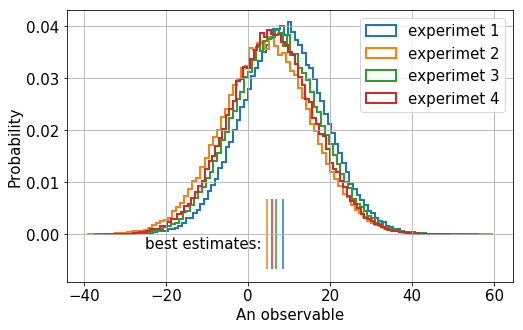

In [71]:
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=15)
fs = 15
linewidth = 2

fig, ax = plt.subplots(figsize=(8,5))

for i,experiment in enumerate(experiments):
    ax.hist(experiment, bins=100, histtype='step', lw=linewidth, alpha=1, density=True, label='experimet %d'%(i+1), color='C%d'%i)
    ax.scatter(experiment.mean(),0, color='C%d'%i, alpha=1, marker='|', s=5000)

ax.set_ylabel('Probability')
ax.set_xlabel('An observable')
ax.legend(loc='best', fontsize=fs)
ax.grid(True)

ax.annotate('best estimates:',(-25,-0.0028), fontsize=fs);

In [46]:
def weight(experiment):
    return 1/np.var(experiment)

def best_estimate(experiment):
    return np.mean(experiment)

def combine_experiments(experiments):
    weights = np.array([weight(experiment) for experiment in experiments])
    b_estimates = np.array([best_estimate(experiment) for experiment in experiments])
    combined_std = 1/np.sqrt(sum(weights))
    b_combined_estimate = np.dot(weights,b_estimates) / sum(weights)
    return b_combined_estimate, combined_std

In [47]:
best_combined_estimate, combined_std = combine_experiments(experiments)
combined_experiment = np.random.normal(best_combined_estimate, combined_std, N)

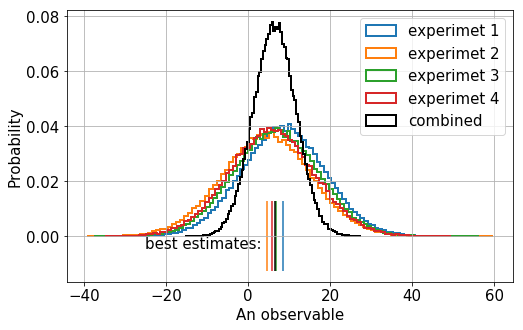

In [70]:
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=15)
fs = 15
linewidth = 2

fig, ax = plt.subplots(figsize=(8,5))

for i,experiment in enumerate(experiments):
    ax.hist(experiment, bins=100, histtype='step', lw=linewidth, alpha=1, density=True, label='experimet %d'%(i+1))
    ax.scatter(experiment.mean(),0, color='C%d'%i, alpha=1, marker='|', s=5000)
    
ax.hist(combined_experiment, bins=100, histtype='step', lw=linewidth, alpha=1, density=True, label='combined', color='k')
ax.scatter(combined_experiment.mean(),0, color='k', alpha=1, marker='|', s=5000)

ax.set_ylabel('Probability')
ax.set_xlabel('An observable')
ax.legend(loc='best', fontsize=fs)
ax.grid(True)
ax.annotate('best estimates:',(-25,-0.0045), fontsize=fs);